In [1]:
import numpy as np
import pandas as pd

In [2]:
# load data
data = pd.read_csv('movie_metadata.csv')

# check- all movies of christopher nolan
# data.loc[data.director_name=='Christopher Nolan']['movie_title']

# check number of rows and columns
# data.shape # 5043 rows, 28 columns

# check columns
# data.columns
# Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
#        'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
#        'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
#        'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
#        'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
#        'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
#        'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
#        'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
#       dtype='object')

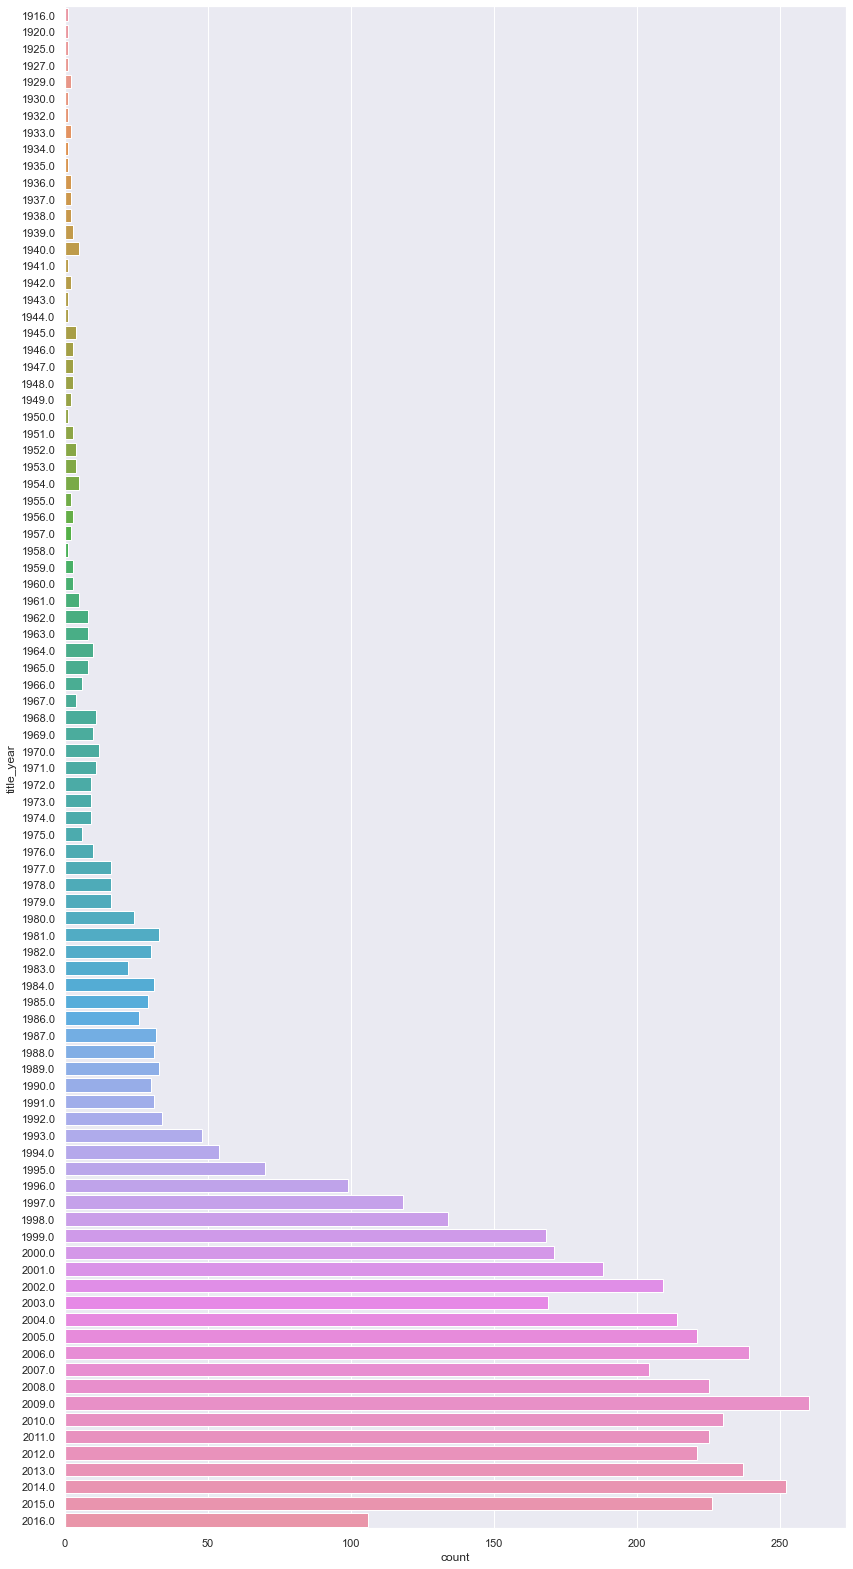

In [3]:
# !pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(14,28)})

# count plot on two categorical variable
sns.countplot(y ='title_year', data = data)

# Show the plot
plt.show()


In [4]:
# recommendation based on these features

# data.loc[rows, columns]
data = data.loc[:, ['director_name',
                    'actor_1_name',
                    'actor_2_name',
                    'actor_3_name',
                    'genres',
                    'movie_title']]

In [5]:
# handling missing data
data['actor_1_name'] = data['actor_1_name'].replace(np.nan, 'unknown')
data['actor_2_name'] = data['actor_2_name'].replace(np.nan, 'unknown')
data['actor_3_name'] = data['actor_3_name'].replace(np.nan, 'unknown')
data['director_name'] = data['director_name'].replace(np.nan, 'unknown')

In [6]:
# removing null characters from movie name
import unicodedata
data['movie_title'] = data['movie_title'].apply(lambda x : unicodedata.normalize("NFKD", x).rstrip())
# new_str = unicodedata.normalize("NFKD", unicode_str)

In [7]:
# splitting genre
data['genres'] = data['genres'].str.replace('|', ', ', regex=True)

In [8]:
data

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,"Action, Adventure, Fantasy, Sci-Fi",Avatar
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,"Action, Adventure, Fantasy",Pirates of the Caribbean: At World's End
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,"Action, Adventure, Thriller",Spectre
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,"Action, Thriller",The Dark Knight Rises
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,Star Wars: Episode VII - The Force Awakens
...,...,...,...,...,...,...
5038,Scott Smith,Eric Mabius,Daphne Zuniga,Crystal Lowe,"Comedy, Drama",Signed Sealed Delivered
5039,unknown,Natalie Zea,Valorie Curry,Sam Underwood,"Crime, Drama, Mystery, Thriller",The Following
5040,Benjamin Roberds,Eva Boehnke,Maxwell Moody,David Chandler,"Drama, Horror, Thriller",A Plague So Pleasant
5041,Daniel Hsia,Alan Ruck,Daniel Henney,Eliza Coupe,"Comedy, Drama, Romance",Shanghai Calling


In [9]:
# exporting to new csv
data.to_csv('data.csv',index=True)